# Исследование надёжности заёмщиков

# Описание проекта

Заказчик — кредитный отдел банка. 

Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

# Описание данных

    children — количество детей в семье
    days_employed — общий трудовой стаж в днях
    dob_years — возраст клиента в годах
    education — уровень образования клиента
    education_id — идентификатор уровня образования
    family_status — семейное положение
    family_status_id — идентификатор семейного положения
    gender — пол клиента
    income_type — тип занятости
    debt — имел ли задолженность по возврату кредитов
    total_income — ежемесячный доход
    purpose — цель получения кредита

# 1. Первичный анализ

# Иипортируем нужные нам библиотеки

In [1]:
import pandas as pd

# Через блок try-except прочтем наш датасет

In [2]:
try:
    df = pd.read_csv(r'C:\Users\vireq\Downloads\practicum_ds_projects\1-AFTER\2. Исследование надежности заемщиков\data.csv')
except FileNotFoundError:
    print("FileNotFoundError: Проверьте корректность пути или наличие самого файла в указанной директории")

# Выведем первые 20 строчек датафрейма df на экран

In [3]:
# Выведем первые 20 строчек датафрейма df на экран
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


# Выведем основную информацию о датафрейме с помощью метода info().

In [4]:
# Выведим основную информацию о датафрейме с помощью метода info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


# Визуализируем наши данные 

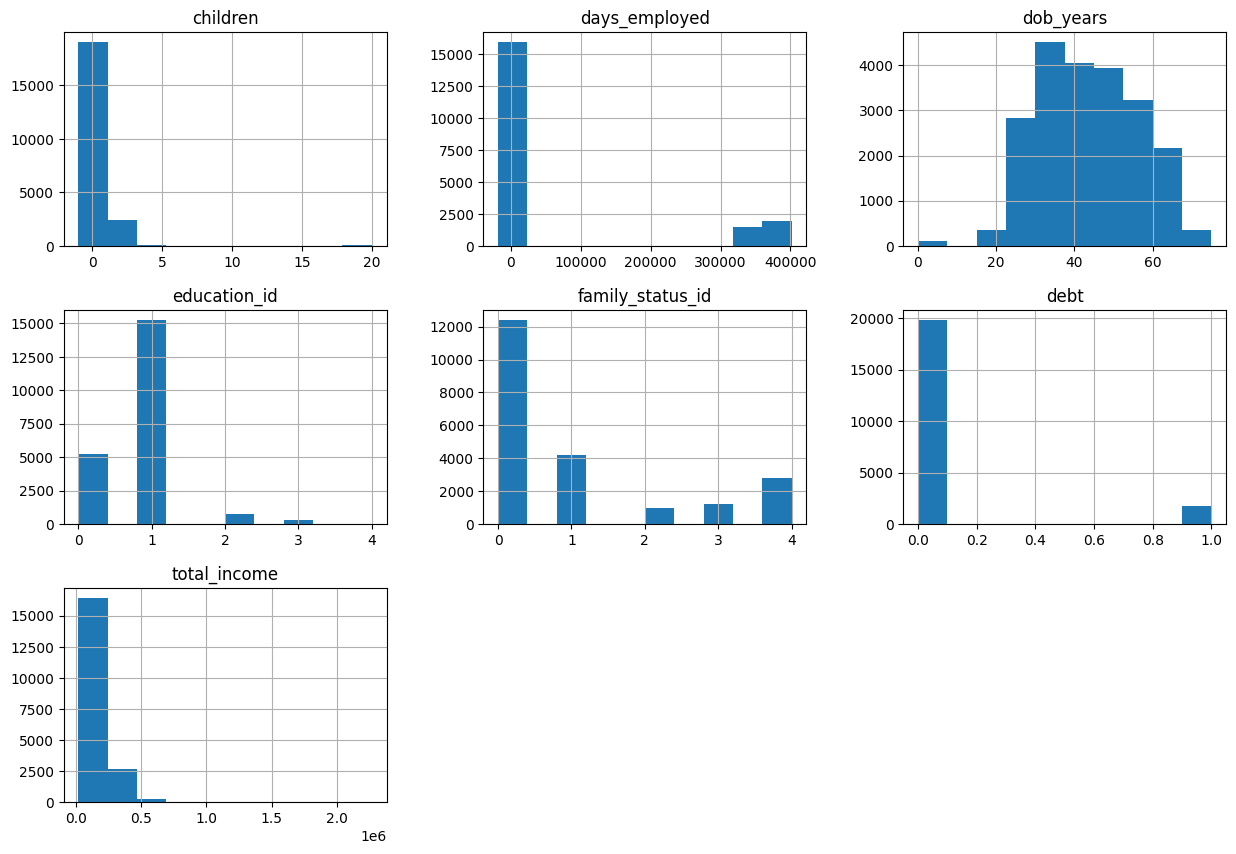

In [5]:
# Визуализируем наши данные
df.hist(figsize=(15,10));

In [6]:
# !pip3 install shap
# import shap
# shap.initjs()
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(test[X])
# shap.summary_plot(shap_values, test[X])

# 2. Предобработка данных

# Выведем количество пропущенных значений для каждого столбца. Используем комбинацию двух методов

In [7]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

# Вывод:

**В двух столбцах есть пропущенные значения. Один из них — days_employed. Другой столбец с пропущенными значениями — total_income — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. Например, у человека с типом занятости сотрудник пропуск в столбце total_income должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [8]:
for t in df['income_type'].unique():
    df.loc[(df['income_type'] == t) & (df['total_income'].isna()), 'total_income'] = \
    df.loc[(df['income_type'] == t), 'total_income'].median()

# Обработка аномалий

**В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце days_employed. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода abs()**

In [9]:
df['days_employed'] = df['days_employed'].abs()

# Для каждого типа занятости выведим медианное значение трудового стажа days_employed в днях

In [10]:
df.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

**Вывод:** У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, однако примим решение оставить их как есть, так как этот столбец не понадобится нам для исследования.

# Выведим перечень уникальных значений признака children

In [11]:
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Вывод:** В столбце children есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма df.

In [12]:
df = df[(df['children'] != -1) & (df['children'] != 20)]

# Ещё раз выведим перечень уникальных значений признака children, чтобы убедиться, что артефакты удалены

In [13]:
df['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

# Заполним пропуски в признаке days_employed медианными значениями по каждого типа занятости income_type

In [14]:
for i in df['income_type'].unique():
    df.loc[(df['income_type'] == t) & (df['days_employed'].isna()), 'days_employed'] = \
    df.loc[(df['income_type'] == t), 'days_employed'].median()

# Убедимся, что все пропуски заполнены

In [15]:
df.isna().sum()

children               0
days_employed       2162
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

# Заменим вещественный тип данных в столбце total_income на целочисленный с помощью метода astype()

In [16]:
df['total_income'] = df['total_income'].astype(int)

# Выведим на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

In [17]:
print("Кол-во дубликатов до удаления", df.duplicated().sum())

Кол-во дубликатов до удаления 54


In [18]:
df = df.drop_duplicates()
print("Кол-во дубликатов после удаления", df.duplicated().sum())

Кол-во дубликатов после удаления 0


# 3. Категоризация данных

# На основании диапазонов, указанных ниже, создадим в датафрейме df столбец total_income_category с категориями:

    0–30000 — 'E';
    30001–50000 — 'D';
    50001–200000 — 'C';
    200001–1000000 — 'B';
    1000001 и выше — 'A'.

# Создадим собственную функцию с именем categorize_income() и методом apply() применим ее к нашему датасету

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
df['total_income_category'] = df['total_income'].apply(categorize_income)

In [21]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B


# Выведим на экран перечень уникальных целей взятия кредита из столбца (признака) purpose

In [22]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

****

# Создадим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:

    'операции с автомобилем',
    'операции с недвижимостью',
    'проведение свадьбы',
    'получение образования'.

In [23]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [24]:
df['purpose_category'] = df['purpose'].apply(categorize_purpose)

****

# 3  Исследуем данные и ответим на вопросы

### ВОПРОС:  Есть ли зависимость между количеством детей и возвратом кредита в срок?

Прежде всего стоит отметить то, что значение '0' в столбце debt - означает отсутствие задолжности, а '1' означает обратное: имел задолженность по кредиту.

Потому, исходя из этого, стоит проводить анализ используя метод pivot_table из pandas, для которого исходными данными будет наш датасет data, в index будем указывать интересующий нас столбец, в values укажем debt, а в aggfunc укажем mean, - так как это сможет показать, что чем больше показатель по конретной группе приближается к '1', - тем ниже вероятность надежности заемщика и возврата кредита в срок, и '0' - в обратном случае

In [25]:
pd.pivot_table(df,
               index='children',
               values='debt',
               aggfunc=['mean'])

,mean
,debt
children,
0,0.075353
1,0.092327
2,0.094542
3,0.081818
4,0.097561
5,0.000000


Вывод: наименьшая вероятность надежности заемщика у тех, кто имеет 4-х детей, и наибольшая вероятность возрата кредита в срок у тех, кто имеет 5 детей

Потому гипотеза о том, что количество детей зависит от возрата кредита в срок - потвердилась, поскольку надежность заемщика отличается между собой у тех, кто 1-го, 2-х, 4-x детей и тех, кто не имел детей, имеет 3-х и 5 детей

### ВОПРОС: Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [26]:
pd.pivot_table(df,
               index='family_status',
               values='debt',
               aggfunc=['mean'])

,mean
,debt
family_status,
Не женат / не замужем,0.097639
в разводе,0.070648
вдовец / вдова,0.066246
гражданский брак,0.092861
женат / замужем,0.075575


Вывод: наименьшая вероятность надежности заемщика у тех, кто имеет статус 'Не женат / не замужем", а наибольшая вероятность у тех, кто имеет статус "вдовец / вдова".

Потому, зависимость между семейным положением и возвратом кредита в срок - есть, ибо мы получаем разные данные по разным категориям статуса

### ВОПРОС: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [27]:
pd.pivot_table(df,
               index='total_income_category',
               values='debt',
               aggfunc=['mean'])

,mean
,debt
total_income_category,
A,0.080000
B,0.070602
C,0.084891
D,0.060172
E,0.090909


Вывод: наименьшая вероятность надежности заемщика у тех, кто имеет категорию "E", а наибольшая вероятность у тех, кто имеет категорию "D"

Потому, зависимость между уровнем дохода и возвратом кредита в срок - есть, поскольку разные категории дохода разняться между собой в большую-меньшую сторону надежости

### ВОПРОС: Как разные цели кредита влияют на его возврат в срок?

In [28]:
pd.pivot_table(df,
               index='purpose_category',
               values='debt',
               aggfunc=['mean'])

,mean
,debt
purpose_category,
операции с автомобилем,0.093436
операции с недвижимостью,0.072531
получение образования,0.092504
проведение свадьбы,0.078744


Вывод: "операции с автомобилем" и "получение образования" - имеют наибольшие приближенные значения к "1", и потому надежность заемщика с данной категорией - минимальна, в то время как "операции с недвижимостью" и "проведение свадьбы" - наиболее приближенны к "0" - и потому это говорит о максимальной надежности заемщика с данной категорией.

В итоге, потверждаем, что разные цели кредита влияют на его возврат в срок, и потвердилась это тем, что одни цели стоят в большем приоритете, чем другие.

# 4. Общий вывод

Общий вывод сведетельствует нам о том, что мы походу работу мы строили разные гипотезы об зависимостях и влияния на надежность заемщика:

1. Гипотеза о том, что количество детей зависит от возрата кредита в срок - потвердилась. Поскольку надежность заемщика отличается между собой у тех, кто имеет 1-го, 2-х, 4-x детей и тех, кто не имел детей, имеет 3-х и 5 детей

2. Предлоложение о том, что есть зависимость между семейным положением и возвратом кредита в срок - потвердилась. Разные категории дохода разняться между собой в большую-меньшую сторону надежости**

3. Предлоложение о том, что есть зависимость между уровнем дохода и возвратом кредита в срок - потвердилась.

4. Предлоложение о том, что есть зависимость между уровнем дохода и возвратом кредита в срок - потвердилась. Одни цели стоят в большем приоритете, чем другие, это "операции с недвижимостью" и "проведение свадьбы" над "операции с автомобилем" и "получение образования"

И потому на основании данных выводов мы можем предполгать клиента с наибольшей (наименьшей) вероятностью просрочки

Наибольшая надежность заемщика и наимешьшая вероятность просрочки у того:

кто не имеет детей, вдовец / вдова, имеет доход от 30001 ло 50000, цель кредита: операции с недвижимостью

Наименьшая надежность заемщика и наибольшая вероятность просрочки у того:

кто имеет 4 детей, Не женат / не замужем, имеет доход от 0 до 30000, цель кредита: операции с автомобилем

_

Примечание: не брали в рассмотрение категорию "количество детей - 5", поскольку их количество в датасете слишком мало, для того чтобы можно было делать общий вывод о вероятности просрочки